# Tutorial 6: Transformers y BERT.

### Cuerpo Docente

- Profesores: [Andrés Abeliuk](https://aabeliuk.github.io/), [Felipe Villena](https://fabianvillena.cl/).
- Profesor Auxiliar: [Gabriel Iturra](https://giturra.cl/)


### Objetivos del Tutorial

- Introducir la arquitectura de Transformers.
- Hablar de BERT un modelo lenguaje, que revolunicio el NLP.
- Revisar como extraer características de BERT, para resolver una tarea especifica.
- Revisar que es el Fine-Tunning y utilizarlo en BERT.

# Introducción

<!-- Aquí la idea es mostrarles como pueden usar BERT y quizás BETO en
español usando la librería Transformers. Me interesa que lo usen
de dos formas:

1) como extractor de vectores contextualizados

2) para hacer fine-tuning a otra task (e.g., Question Answering).
 -->


------------------------------------------------------
En esta clase vamos a utilizar BERT, un modelo de lenguaje desarrollado por Google. Este modelo rompió varios récords en NLP y de hecho, cada vez que buscan en Google, BERT ayuda a refinar sus búsquedas.

## **¿Qué es BERT?**

BERT es un personaje de plaza sésamo, al igual que ELMo, los cuales saben mucho de lenguaje y podemos ver con una mirada desafiante en la siguiente imagen:

![bert y elmo](https://i.imgur.com/1T4kyrq.png)

Los genios dándole nombres a los papers decidieron que era buena idea que los acrónimos se refirieran a los personajes de plaza sesamo, con los cuales algunos de ellos aprendieron a hablar y deletrear. Al igual que **ELMO**, **Embeddings from Language MOdels**, **BERT** es el acrónimo de **Bidirectional Encoder Representations from Transformers**. \\

Estos dos modelos producen **contextualized word embeddings**. A diferencia de los modelos que producen static word embeddings como Word2Vec, la representación no depende solo de la palabra, sino que de la palabra y su contexto. Por lo tanto, cada palabra tiene infinitas representaciones, lo cual es mucho más flexible que tener solo un vector para cada palabra.

Esto permite al modelo distinguir casos donde una palabra tiene diferentes significados, como por ejemplo:
- "El señor se sienta en el **banco** de la plaza."
- "El ladrón asaltó el **banco.**






## **¿Qué significa Bidirectional Encoder Representations from Transformers?**
A diferencia de **ELMo**, el cual era una **concatenación de información de izquierda-derecha y derecha-izquierda**, **BERT es bidireccional**, es decir, toma en cuenta los **contextos a la izquierda y derecha de la palabra simultáneamente**.

**BERT** además utiliza **Transformers**, arquitecturas de deep learning altamente **paralelizables** que cuentan con un proceso de Encoder-Decoder. Dado que el objetivo de BERT es generar un modelo de lenguaje, solo es necesario el mecanismo de Encoding y le dejan el proceso de Decoding a las distintas tasks.


## **¿Qué es un Transformer?**

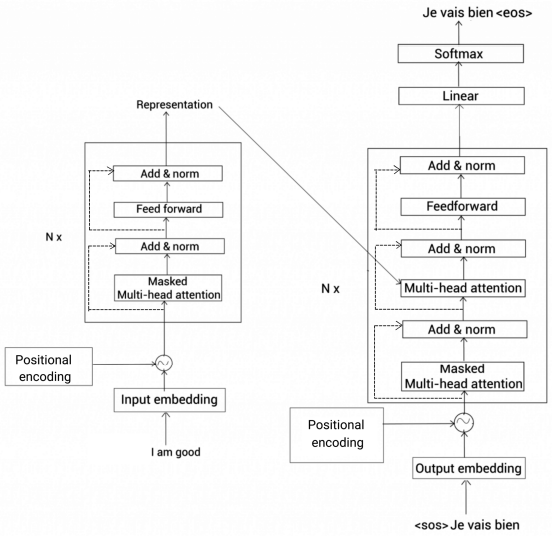

Contrario a lo esperado los transformer no son estos vehículos que se transforman en robots... Los transformers son arquitecturas basadas en encoder-decoder y tuvieron su principal enfoque en solucionar la tarea de traducción de textos, esto ya que tenemos secuencias de palabras que estamos interesados en transformarlas a un determinado lenguaje.

De la figura superior, podemos notar que esta GRAN estructura está conformada por dos partes principalmente que cumplen las siguientes funciones:

- **Encoder** (estructura de la izquierda): Esta parte recibe los tokens y los transforma en una secuencia de embedding.
- **Decoder** (estructura de la derecha): Utiliza los hidden state del encoder para generar de forma iterativa una secuencia de tokens.

Por otro lado, algunos de los puntos que caracterizas a esta arquitectura son los siguientes puntos:

- Las entradas son tokenizadas y transformadas en embeddings, luego producto que la capa de atención no identifica la posición de las palabras, se combina la entrada con una capa de embeddings posicionales que contiene información posicional de los tokens.
- Los encoder son compuestos por capas apiladas de encoder, esto es similar a lo que se hace en computer vision donde se apilan varias CNN para obtener mejores representaciones de las imagenes. Este principio se repite tanto para los encoders como decoders.
- Las salidas de los encoder alimentan al decoder para predecir secuencialmente los tokens de palabras siguientes.

### **Mas vale tomar Attention**

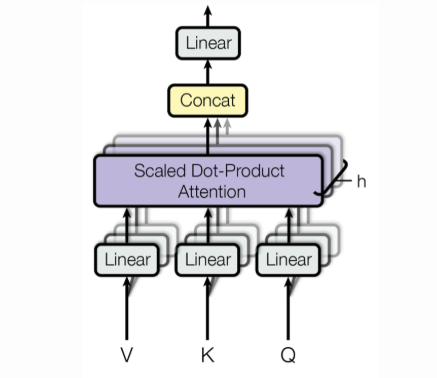

Una de las partes mas relevantes de este tipo de redes es la fuerte presencia de Multi-Head Attention layers. Pero para ilustrar como funcionan estas capas, revisaremos lo que hace su unidad basica conocida como self-attention, quien permite que una red neuronal asigne un peso de "atención" a cada elemento de una secuencia.

La idea de este mecanismo es que de en vez de usar fixed embedding para cada uno de los token, generemos representaciones que sean la suma ponderada de cada embedding, por lo tanto buscamos modificar los embedding originales generando contextualized embeddings 😯.

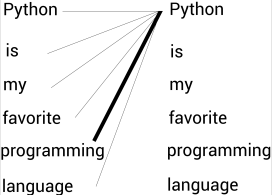

Pero... cuentame un poco mas sobre la **Scaled dot-product attention**, ¿que hace?.

En este bloque de la arquitectura es donde ocurre toda la magia en el ocurre lo siguiente:

1. Proyecta cada uno de los embedding en tres vectores  llamados Query, Value y Key.
2. Se calcula el score de Attention realizando un producto punto entre Q y K. Esto nos entres que tan similares son los tensores unos de otros.
3. Se escala el Attention Score diviendolo por la raiz del largo del tensor Q.
4. Se aplica una softmax al paso anterior y se actualiza el token embedding.

Link al gran paper original ---> [All you need is attention](https://arxiv.org/pdf/1706.03762.pdf).

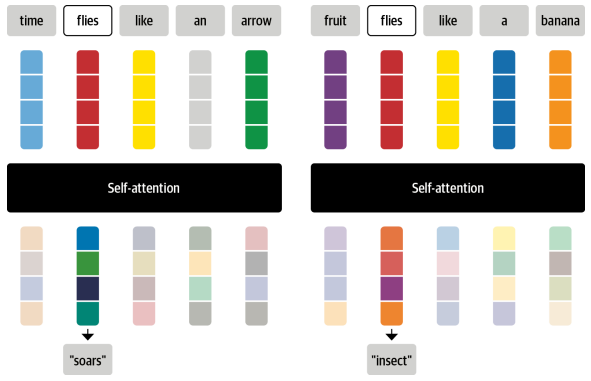

## **¿Qué resuelve BERT? ¿Cómo fue entrenado?**

El primer objetivo de **BERT** es resolver la tarea llamada **masked language modeling**. En este modelo, **las palabras de una frase se borran al azar y se reemplazan por un token especial** ([MASK]) con probabilidad 15%. Luego, se utiliza un Transformer para generar una **predicción para la palabra remplazada** por [MASK] basada en las palabras no enmascaradas que la rodean, tanto a la izquierda como a la derecha.

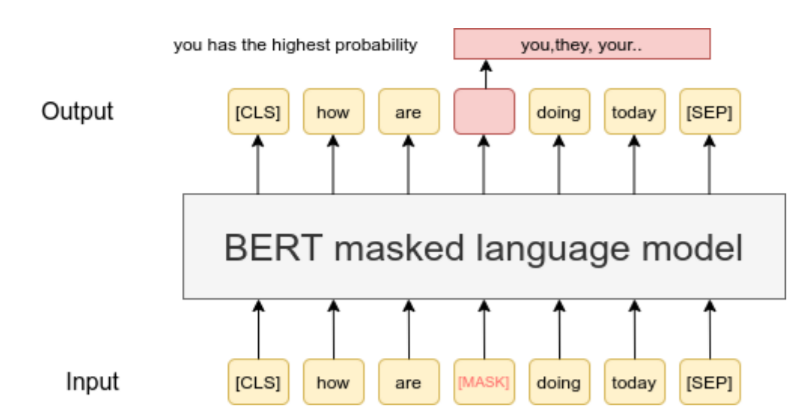

El segundo objetivo de **BERT** es resolver la tarea de **Next Sentence Prediction**. El modelo recibe **dos oraciones como entrada** y aprende a predecir **si la segunda oración del par es la oración que siguiente del documento original**. Durante el entrenamiento, el 50% de los inputs son un par en el que la segunda frase es la frase siguiente en el documento original, mientras que en el otro 50% se elige una frase aleatoria del corpus como segunda frase.

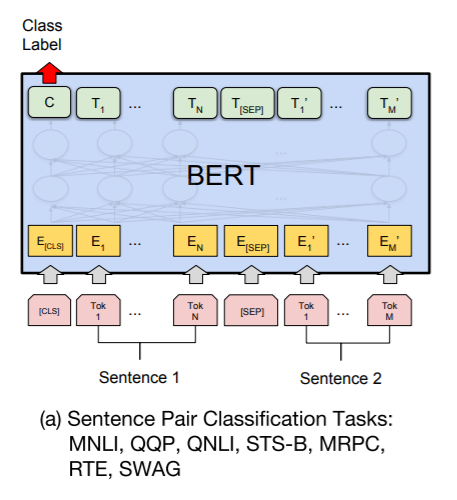


Pueden leer un poco más [acá](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270).



## **¿Oye, pero esto suena un poco magico, tienes algunos ejemplos?**

Hay bastantes librerías que tienen el modelo **pre-entrenado** a disposición, partiendo por el [GitHub de BERT](https://github.com/google-research/bert) implementado en TensorFlow. Como nosotros sabemos utilizar **pytorch**, utilizaremos la [version de HuggingFace](https://huggingface.co/transformers/) la cual es respaldada por el github de Google y la elogian: "which is compatible with our pre-trained checkpoints and is able to reproduce our results". Esta version se importa con la libreria transformers. Otras version disponibles son [sentence-bert](https://github.com/UKPLab/sentence-transformers) o [bert-as-service](https://github.com/hanxiao/bert-as-service).

In [ ]:
%%capture
!pip install transformers
!pip install datasets
!pip install bertviz
!pip install torch

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

Veamos el primer ejemplo que entrega la documentación

In [ ]:
# Si estamos utilizando google colab, no se preocupen por las descargas, ya que las hace el servidor de colab y no les gasta ancho de banda a uds
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # Cargamos el tokenizador
model = BertModel.from_pretrained('bert-base-uncased') # Cargamos el modelo pre-entrenado

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)

30522
512


Aquí es sumamente importante que para **TODO** modelo pre-entrenado utilicen el mismo tokenizador con el que fue entrenado el modelo. Cambiar el tokenizador es básicamente cambiar el vocabulario que está entrando al modelo (por la forma que ya están mapeadas las palabras). Por esto, si llegan a elegir un tokenizador que no sea de BERT podrían estar diciendo que un "caballo" es un "gato".

In [ ]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

model_ckpt = "bert-base-uncased"
tokenizer_viz = BertTokenizer.from_pretrained('bert-base-uncased')
model_ckpt = BertModel.from_pretrained(model_ckpt)
text = "time flies like an arrow"
show(model_ckpt, "bert", tokenizer_viz, text, display_mode="light", layer=0, head=8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Como se pudieron dar cuenta es muy sencillo cargar un modelo pre-entrenado de bert, pero con esto podemos preguntarnos: ¿hay solo un modelo BERT?, la respuesta a esto es no, ya que los genios de Google al entrenar el modelo generaron variantes relacionadas al tamaño de la arquitectura y con variaciones del texto que utilizaron para entrenar. La siguiente tabla resume los modelos:

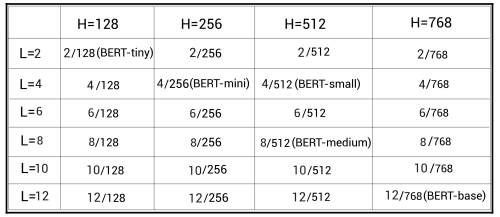

En la tabla, H representa la cantidad de unidades ocultas que poseen las arquitecturas, mientras que L representa el número de capas de encoder que posee el modelo. Con esto, podemos visualizar la existencia 5 tipos de modelos que varían por tamaño, es importante notar con esto que estos diferentes tamaños producirán diferencias en el rendimiento (así que ojo con su elección).

Finalmente, va a ser común que al momento que ustedes carguen los modelos vean un tal `uncased` o `cased`, no asusteis con estom esto simplemente señala lo siguiente:

- `uncased`: Se refiere a un modelo de BERT que considera los tokens en minúscula.
- `cased`: Se refiere a un modelo de BERT que considero los tokens sin modificaciones, o sea no se realiza la transformación a minúsculas.

**OJO 👁️:** La existencia de estos casos no es porqué sí. Para tareas como NER puede ser mejor la utilización de `cased` debido a que hay palabras que pueden cambiar el significad con mayúsculas en ciertos caracteres.

### **Todo muy bonito, pero en sintesís, ¿para que se ocupan estos modelos pre-entrenados?**

Estos modelos pre-entrenados permiten aterrizan a los mortales como nosotros (personas sin GPUs monstruosas) modelos que exigen largos tiempos de entrenamiento y recursos. permitiéndonos generar estructuras que nos permiten fácilmente:

- Extraer features contextualizadas desde el texto.
- Fine-tunear BERT para obtener mejores rendimientos en diferentes tareas de NLP.




### **Obteniendo Embeddings Contextualizados**
Lo primero que vamos a hacer es **transformar una frase en su representación vectorial usando BERT**. Por defecto, la dimensión de la salida es 768, es decir, cada token en mi frase va a ser representado por un vector de 768 elementos.

In [ ]:
# Lo primero que hacemos es tokenizar nuestra frase
# 'pt' especifica que queremos vectores de pytorch, 'tf' seria en tensorflow
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

# Esto tokeniza la frase como:
# [[CLS], "Hello", ",", "my", "dog", "is", "cute", [SEP]]
# Tenemos 8 tokens, contando el CLS (101) y el SEP (102)
# Output: tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]])
inputs

{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
# Luego le pasamos la frase tokenizada al modelo pre-entrenado
outputs = model(**inputs)

# Aqui el doble asterico es una forma de pasar multiples parámetros a una función desde un único diccionario, por ejemplo:
# d = {'a': 1, 'b':2}; model(**d) sería equivalente a pasar cada variable como: model(a=1,b=2)


# El ultimo hidden-state es la transformación en embeddings que nos interesa.
# Para convencerse pueden pensar que es el último paso antes de aplicar una softmax.
last_hidden_states = outputs.last_hidden_state.squeeze(0) # squeeze en la primera dimension ya que es 1

print(inputs['input_ids']) # Tenemos 8 tokens, contando el CLS (101) y el SEP (102)
print(last_hidden_states.shape) # Tenemos 8 vectores de 768 dimensiones
print(last_hidden_states)

tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]])
torch.Size([8, 768])
tensor([[-0.1144,  0.1937,  0.1250,  ..., -0.3827,  0.2107,  0.5407],
        [ 0.5308,  0.3207,  0.3665,  ..., -0.0036,  0.7579,  0.0388],
        [-0.4877,  0.8849,  0.4256,  ..., -0.6976,  0.4458,  0.1231],
        ...,
        [-0.7003, -0.1815,  0.3297,  ..., -0.4838,  0.0680,  0.8901],
        [-1.0355, -0.2567, -0.0317,  ...,  0.3197,  0.3999,  0.1795],
        [ 0.6080,  0.2610, -0.3131,  ...,  0.0311, -0.6283, -0.1994]],
       grad_fn=<SqueezeBackward1>)


### **Obtener representación de una oración desde el último hidden-state**

Quizás en vez de trabajar con **Word Embeddings** nos convenga trabajar con **Sentence Embedding**. Podemos pensar en un Sentence Embedding con **la mezcla** de los Words Embedding de mi input. Los autores de BERT usaban el token [CLS] para este propósito, aunque no es muy recomendado, ya que depende del **fine tunning** (veremos esto más adelante). Otra opción, mucho más usada,es tomar el **promedio de todos mis word embeddings**. Hay más formas de pooling (es decir como se mezclan los tokens), por ejemplo, podemos ver las de bert-as-service [acá](https://github.com/hanxiao/bert-as-service#q-what-are-the-available-pooling-strategies).

In [ ]:
# Representacion con average
# Recordemos que nuestra frase tokenizada tiene 8 elementos
# y que el primero y el ultimo son tokens especiales: [CLS] y [SEP], por lo que los descartamos.
average = torch.mean(last_hidden_states[1:-1], 0)
print(average.shape)
print(torch.equal(average, average))

torch.Size([768])
True


# **Predecir la frase siguiente con BERT**

Usemos BERT para una de las tareas con las que fue entrenado: **predecir si una frase es la siguiente o no**. Para esto vamos a utilizar BertForNextSentencePrediction.

In [ ]:
from transformers import BertForNextSentencePrediction

Utilizamos el tokenizador común de BERT, solo cambiamos el modelo.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForNextSentencePrediction.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForNextSentencePrediction: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Creamos una función que nos dice si tiene sentido o no la oración que continua.

In [ ]:
def evaluar_oraciones(primera,segunda):
  encoding = tokenizer(primera, segunda, return_tensors='pt')
  output = model(**encoding, labels=torch.LongTensor([1])) # El label representa cual es la oración
  logits = output.logits.squeeze(0) # Tiene un solo elemento en la dimension 0

  # Notar que logits[0] entrega el score que la oracion si sea la siguiente (que tan True)
  # logits[1] entrega el score de que la oracion no sea la siguiente (que tan False)
  # ambos valores de logits están en el rango (-inf, inf)
  # Se puede aplicar una SoftMax sobre estos resultados para que sean probabilidades
  # Pero no es necesario.

  if logits[0] < logits[1]:
    print("La oración no tiene nada que ver")
  elif logits[0] > logits[1]:
    print("La oración es una continuación")
  else:
    print("No estoy seguro")


Probemos este código con algunos ejemplos

In [ ]:
prompt = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
next_sentence = "The sky is blue due to the shorter wavelength of blue light."
evaluar_oraciones(prompt,next_sentence)

La oración no tiene nada que ver


In [ ]:
prompt = "I'm really hungry."
next_sentence = "I'm getting a BigMac."
evaluar_oraciones(prompt,next_sentence)

La oración es una continuación


## BERT como extractor de features

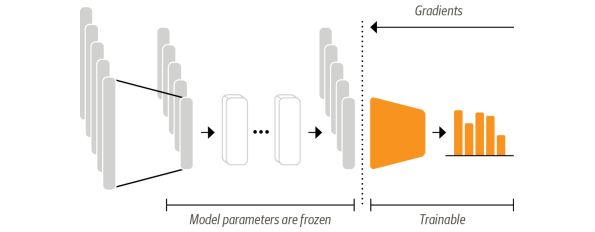

La idea detrás de esta tarea es utilizar una red pre-entrenada de BERT para generar solamente Features, tal cual como usábamos Word2Vec peroo quizás un poquito…. (si un poquito nomas) más complicado por el uso extracto de ciertos tokenizadores y extracción de hidden states.

Para esto comenzaremos cargando el `distilbert-base-uncased`, con el que realizaremos  una tarea de clasificación de sentimientos (muy similar a lo que hicimos en la primera competencia).

Para este ejemplo nos basamos en un ejercicio del libro `Natural Language
Processing with Transformers`.

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModel
from datasets import load_dataset
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model_distilbert = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Cargado el modelo, usaremos para el entrenamiento un dataset dispuesto por la librería `datasets`, donde el dataset posee un conjunto de textos que están etiquetados con determinados sentimientos.

In [ ]:
# Cargamos un dataset que forma parte de la librería datasets
emotions = load_dataset("emotion")

In [ ]:
# Revisamos algunos ejemplos para ver que tiene
emotions['train']['text'][:5]

Using custom data configuration default
Reusing dataset emotion (/root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

Paso siguiente, como queremos generar features utilizando BERT, crearemos unas funciones que nos permiten extraer los hidden state del modelo de BERT. Finalmente generaremos un dataset en el formato ultra conocido de `DataSet` para entrenar un modelito pequeño.

In [ ]:
def tokenize(batch):
  # Por cada batch vamos a obtener el texto, tokenizarlo y aplicar padding
  return tokenizer(batch["text"], padding=True, truncation=True)

def extract_hidden_states(batch):
 # Vamos a extraer los hidden states desde BERT, para esto pasamos el modelo
 # dispositivo
 inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
 # Extraimos solamente la last hidden state
 with torch.no_grad():
   last_hidden_state = model(**inputs).last_hidden_state
 # representaciones vectoriales que tanto queriamos :D
 return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

# Aplicamos funciones creadas
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Parameter 'function'=<function tokenize at 0x7f9e600a28c0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
# Revisamos que tiene el dataset creado
emotions_hidden['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 16000
})

Generamos las estructuras "clasicas" para entrenar un  modelo de regresión logistica mas tarde.

In [ ]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

Pregunta.... ¿cómo se ven las features?... Antes de entrenar y predecir el desempeño del modelo vamos a ver representaciones visuales de las features, para ver si estas tienen una tendencia a generar patrones en los datos. Para esto utilizamos un reductor de dimensionalidad llamado TSNE (ya que más de 3d es imposible ver para nosotros) y... probamos!

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import pandas as pd

# Escalamos los datos
X_scaled = MinMaxScaler().fit_transform(X_train)
# Reducimos la dimensionalidad con TSNE de 768 a 2
mapper = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_scaled)

# Creamos dataframe para el plot
df_emb = pd.DataFrame(mapper, columns=["X", "Y"])
df_emb["label"] = y_train

In [ ]:
df_emb.head()

,X,Y,label
0,39.557178,3.781127,0
1,-36.515816,-24.636724,0
2,63.109146,3.957982,3
3,-20.958296,6.983392,2
4,-33.356834,3.537490,3


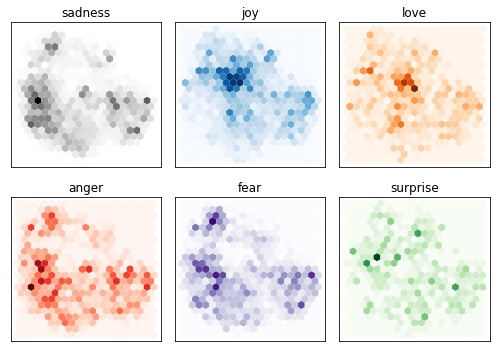

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
 df_emb_sub = df_emb.query(f"label == {i}")
 axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
 gridsize=20, linewidths=(0,))
 axes[i].set_title(label)
 axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

Como podemos ver, las palabras tienden a agruparse de diferente manera según los sentimientos, esto resulta muy interesante, ya que potencialmente un clasificador podrá identificar estos patrones 😯.

Probemos con un clasificador ultra basico, la muy bien conocida Regresión logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

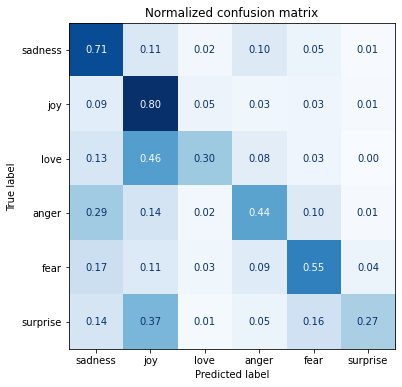

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

De los resultados, resulta interesante que a través de las features generadas logremos un modelo que logra discernir ante varias labels utilizando solamente un clasificador tan básico como logistic regression.

## **Fine-tuning y BERT**

Una de las razones por las que BERT ha sido tan popular es por la **posibilidad de adaptarlo a múltiples tareas** además de las originales con las que fue entrenado (Masked Language Modeling y Next Sentence Prediction sobre corpus muy grandes).

Esta adaptación se hace a través un proceso llamado **fine-tuning** que consiste en tomar el modelo original con sus **parámetros ya entrenados** y usarlo como **inicialización de un nuevo modelo**, es decir, entrenarlo sobre otra tarea con otros inputs y outputs. Esto hace que los parámetros calculados para de BERT sean actualizados acorde a la nueva tarea. Esto también es conocido como **transfer learning**.  


La **librería transformers** nos presta modelos con decoders fine-tuneados en ciertas tareas y hasta podemos fine-tunearlos nosotros.

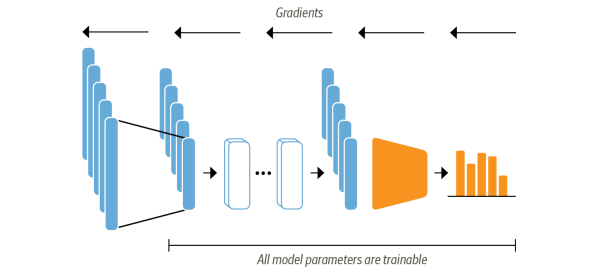

La leyenda cuenta que entrenar bert-base desde cero en las cloud TPU de Google es una cifra cercana a los 2000 dólares. Estudiantes del DCC tuvieron la experiencia de entrenarl BERT para un corpus de español.

## **BETO y el DCC**

https://github.com/dccuchile/beto

https://users.dcc.uchile.cl/~jperez/papers/pml4dc2020.pdf

## **Entrenando BERT para una tarea en específico**

Para esto debemos fine-tunear el modelo con nuestros datos. Tomé [este](https://medium.com/swlh/painless-fine-tuning-of-bert-in-pytorch-b91c14912caa) tutorial como referencia por si algún paso no queda lo suficientemente claro. Vamos a fine-tunear BERT para realizar **sentiment classification**.

Lo primero es inicializar un modelo de BERT **sin fine-tuning**

In [ ]:
from transformers import BertModel

In [ ]:
#Creamos un modelo de BERT limpio
bert_model = BertModel.from_pretrained('bert-base-uncased')
#El mismo tokenizador de antes
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Debemos entender como se le pasan los datos a BERT. Imaginemos que queremos agregar varias oraciones simultaneamente. Como lo hacemos con tensores si tienen largo distinto? La solucion a esto es aplicar padding, es decir agregar tokens para que todas las secuencias tengan el mismo largo. \
Esto podría traer problemas si es que BERT llegase a interpretar estos tokens como partes de la oración, para eso es que es necesario especificarle a BERT cuales son los tokens a los que les tiene que tomar atención.

Por ejemplo, si tuviesemos un largo máximo de 12 tokens, para padear la oración 'I really enjoyed this movie a lot.' hariamos lo siguiente:

In [ ]:
#Largo maximo de los tokens
T = 12
sentence = 'I really enjoyed this movie a lot.'
#Step 1: Tokenizar
tokens = tokenizer.tokenize(sentence) # ['i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.']
#Step 2: Agregar [CLS] y [SEP]
tokens = ['[CLS]'] + tokens + ['[SEP]'] # ['[CLS]','i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.', '[SEP]']
#Step 3: Padear tokens
padded_tokens = tokens + ['[PAD]' for _ in range(T - len(tokens))] #    ['[CLS]','i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.', '[SEP]', '[PAD]', ... , '[PAD]']
attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens] # [    1  , 1 ,    1    ,    1     ,   1   ,    1   ,  1 ,   1  ,  1 ,   1    ,    0   , ... ,    0   ]
#Step 4: Segment ids: Estos representan cuando tienes 2 oraciones, la primera se llena con 0's y la segunda con 1's
seg_ids = [0 for _ in range(len(padded_tokens))] # En este caso no la usaremos, ya que es solo 1 oración. Su representacion son solo 0's
#Step 5: Cambiamos los tokens por su respectivo numero, CLS = 101, SEP = 102, etc...
token_ids = tokenizer.convert_tokens_to_ids(padded_tokens)

#Los cambiamos a tensores de pytorch antes de que entren al modelo, y es necesario agregarles una dimension extra.
# Esta dimension representa cuantas oraciones estamos pasando
token_ids = torch.tensor(token_ids).unsqueeze(0) #Shape : [1, 12]
attn_mask = torch.tensor(attn_mask).unsqueeze(0) #Shape : [1, 12]
seg_ids   = torch.tensor(seg_ids).unsqueeze(0) #Shape : [1, 12]

#Y al igual que antes podemos pasarselos a BERT
output = bert_model(token_ids, attention_mask = attn_mask, token_type_ids = seg_ids)
print(output.last_hidden_state.shape)
#Out: torch.Size([1, 12, 768])
#Out: torch.Size([1, 768])

torch.Size([1, 12, 768])


No está de más agregar que BERT tiene un maximo de 512 tokens por input, por lo que si queremos agregar un texto muy grande debemos o truncarlo o separarlo en 2.\
Ahora que aprendimos como paddear oraciones, utilizaremos el Stanford Sentiment Tree Bank dataset que contiene movie reviews con sentimiento positivo (1) y negativo (0).\
Primero crearemos una clase para cargar los datos, extendiendo la clase Dataset que viene con pytorch:


In [ ]:
from torch.utils.data import Dataset
import pandas as pd

class SSTDataset(Dataset):
    # Inicializacion de la clase
    def __init__(self, filename, maxlen):
        #Guardar los contenidos del dataframe
        self.df = pd.read_csv(filename, delimiter = '\t')
        #Initialize the BERT tokenizer
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        # Establecer el largo máximo
        self.maxlen = maxlen

    # Funcion auxiliar que retorna el largo del dataframe
    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        #Seleccionamos la oracion y el label de este dataset en especifico.
        sentence = self.df.loc[index, 'sentence']
        label = self.df.loc[index, 'label']

        #Realizamos todo el pre-procesamiento que explicamos anteriormente
        tokens = self.tokenizer.tokenize(sentence)
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        if len(tokens) < self.maxlen: # Comparamos con la cantidad maxima de tokens que dimos
            tokens = tokens + ['[PAD]' for _ in range(self.maxlen - len(tokens))] # Si es mas corta agregamos padding
        else:
            tokens = tokens[:self.maxlen-1] + ['[SEP]']  # Si es mas larga la cortamos

        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens) #Utilizamos el tokenizador para pasarlos a id
        tokens_ids_tensor = torch.tensor(tokens_ids) #Pasamos a tensor de pytorch

        #1 para los tokens no padeados, 0 si es padding
        attn_mask = (tokens_ids_tensor != 0).long()
        return tokens_ids_tensor, attn_mask, label

Creamos los dataloaders

In [ ]:
from torch.utils.data import DataLoader

#Creamos instancias del training y validation sets
train_set = SSTDataset(filename = 'train.tsv', maxlen = 30)
val_set = SSTDataset(filename = 'dev.tsv', maxlen = 30)

#Creamos los dataloaders
train_loader = DataLoader(train_set, batch_size = 64, num_workers = 2)
val_loader = DataLoader(val_set, batch_size = 64, num_workers = 2)

Ahora la parte más importante, generar nuestro modelo:

In [ ]:
import torch.nn as nn
class SentimentClassifier(nn.Module):
    def __init__(self, freeze_bert = True):
        super(SentimentClassifier, self).__init__()
        #Creamos una instancia de BERT sin entrenamiento previo
        self.bert_layer = BertModel.from_pretrained('bert-base-uncased').cuda()

        #Con esto podemos bloquear el entrenamiento de BERT, para comparar incluyendo el entrenamiento de bert y sin
        if freeze_bert:
            for p in self.bert_layer.parameters():
                p.requires_grad = False

        #La capa para clasificar
        #La idea es transformar una representacion de BERT (768 dimensiones) en 1 o 0 que representa el sentimiento
        self.cls_layer = nn.Linear(768, 1).cuda()

    def forward(self, seq, attn_masks):
        '''
        Inputs:
            seq : Tensor of shape [B, T] containing token ids of sequences
            attn_masks : Tensor of shape [B, T] containing attention masks to be used to avoid contibution of PAD tokens
        '''
        #Le pasamos el input al modelo BERT
        cont_reps = self.bert_layer(seq, attention_mask = attn_masks)
        #print(cont_reps.last_hidden_state)

        #Obtenemos la representacion del token CLS
        cls_rep = cont_reps.last_hidden_state[:, 0]

        #Pasamos el token CLS por la capa de clasificacion
        logits = self.cls_layer(cls_rep)

        return logits

Utilizaremos binary cross-entropy loss y un descenso de gradiente estocastico

In [ ]:
import torch.optim as optim
#Creamos el classificador de sentimiento basado en BERT
net_freezed = SentimentClassifier(freeze_bert = True)
net_not_freezed = SentimentClassifier(freeze_bert = False)

criterion = nn.BCEWithLogitsLoss()
opti_freezed = optim.Adam(net_freezed.parameters(), lr = 2e-5)
opti_not_freezed = optim.Adam(net_not_freezed.parameters(), lr = 2e-5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predic

Agregamos funciones axuliares para medir el desempeño del entrenamiento:

In [ ]:
def get_accuracy_from_logits(logits, labels):
    probs = torch.sigmoid(logits.unsqueeze(-1))
    soft_probs = (probs > 0.5).long()
    acc = (soft_probs.squeeze() == labels).float().mean()
    return acc

def evaluate(net, criterion, dataloader):
    net.eval() # Modo evaluacion del modelo, pesos no serán modificados
    mean_acc, mean_loss = 0, 0
    count = 0
    with torch.no_grad(): # Los gradientes no serán guardados tampoco
        for seq, attn_masks, labels in dataloader:
            seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()
            logits = net(seq, attn_masks)
            mean_loss += criterion(logits.squeeze(-1), labels.float()).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

Y con la siguiente funcion entrenamos los parametros

In [ ]:
def train(net, criterion, opti, train_loader, val_loader, epochs):
    for ep in range(epochs): # Iterador de las epocas
        for it, (seq, attn_masks, labels) in enumerate(train_loader):
            #Clear gradients
            opti.zero_grad()
            #Enviamos los tensores a la GPU
            seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()

            #Evaluamos nuestro modelo en la secuencia y la mask de atencion
            logits = net(seq, attn_masks)

            #Calculamos la loss
            loss = criterion(logits.squeeze(-1), labels.float())

            #Backpropagation
            loss.backward()

            #Optimization step
            # Ojo que si no tenemos freeze_bert en true, vamos a entrenar los parametros de bert tambien.
            opti.step()

            if (it + 1) % 100 == 0:
                acc = get_accuracy_from_logits(logits, labels)
                print("Iteration {} of epoch {} complete. Loss : {} Train Accuracy : {}".format(it+1, ep+1, loss.item(), acc))
        val_acc, val_loss = evaluate(net, criterion, val_loader)
        print("Epoch {} complete! Validation Accuracy : {}, Validation Loss : {}".format(ep+1, val_acc, val_loss))

Y finalmente entrenamos ambos modelos

In [ ]:
epochs = 3
train(net_freezed, criterion, opti_freezed, train_loader, val_loader, epochs)

Iteration 100 of epoch 1 complete. Loss : 0.5840529203414917 Train Accuracy : 0.765625
Iteration 200 of epoch 1 complete. Loss : 0.6122615933418274 Train Accuracy : 0.6875
Iteration 300 of epoch 1 complete. Loss : 0.579427182674408 Train Accuracy : 0.765625
Iteration 400 of epoch 1 complete. Loss : 0.6084474325180054 Train Accuracy : 0.6875
Iteration 500 of epoch 1 complete. Loss : 0.5612025856971741 Train Accuracy : 0.78125
Iteration 600 of epoch 1 complete. Loss : 0.59170001745224 Train Accuracy : 0.703125
Iteration 700 of epoch 1 complete. Loss : 0.5421786308288574 Train Accuracy : 0.828125
Iteration 800 of epoch 1 complete. Loss : 0.5512491464614868 Train Accuracy : 0.765625
Iteration 900 of epoch 1 complete. Loss : 0.5922819972038269 Train Accuracy : 0.78125
Iteration 1000 of epoch 1 complete. Loss : 0.5520168542861938 Train Accuracy : 0.75
Epoch 1 complete! Validation Accuracy : 0.8069196939468384, Validation Loss : 0.5539369881153107
Iteration 100 of epoch 2 complete. Loss : 0.5

In [ ]:
train(net_not_freezed, criterion, opti_not_freezed, train_loader, val_loader, epochs)

Iteration 100 of epoch 1 complete. Loss : 0.2895839214324951 Train Accuracy : 0.875
Iteration 200 of epoch 1 complete. Loss : 0.48102501034736633 Train Accuracy : 0.78125
Iteration 300 of epoch 1 complete. Loss : 0.3331924080848694 Train Accuracy : 0.875
Iteration 400 of epoch 1 complete. Loss : 0.1499415934085846 Train Accuracy : 0.90625
Iteration 500 of epoch 1 complete. Loss : 0.06840620934963226 Train Accuracy : 0.96875
Iteration 600 of epoch 1 complete. Loss : 0.12740904092788696 Train Accuracy : 0.953125
Iteration 700 of epoch 1 complete. Loss : 0.3123549818992615 Train Accuracy : 0.875
Iteration 800 of epoch 1 complete. Loss : 0.05757877975702286 Train Accuracy : 0.984375
Iteration 900 of epoch 1 complete. Loss : 0.14274127781391144 Train Accuracy : 0.953125
Iteration 1000 of epoch 1 complete. Loss : 0.12794911861419678 Train Accuracy : 0.96875
Epoch 1 complete! Validation Accuracy : 0.8995535969734192, Validation Loss : 0.2452744325356824
Iteration 100 of epoch 2 complete. Loss

Comparando ambos entrenamientos, pasamos de 82% a ~90% en 5 epocas. El primer entrenamiento solo entrenamos la capa de clasificacion mientras que en el segundo tambien modificamos los parametros de BERT.

Este ultimo entrenamiento es lo que llamamos **fine-tunning**. Lo más importante de esto es que **no necesitamos un super computador** para poder mejorar las representaciones en una tarea especifica.

# Para Cerrar

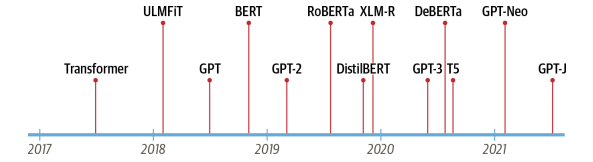